# **Penerapan PCA untuk Prediksi Penghasilan Menggunakan Logistic Regression**

## Table of Contents

The contents of this kernel is divided into various topics which are as follows:-

-   The Curse of Dimensionality
-	Introduction to Principal Component Analysis
-	Import Python libraries
-	Import dataset
-	Exploratory data analysis
-	Split data into training and test set
-	Feature engineering
-	Feature scaling
-	Logistic regression model with all features
-	Logistic Regression with PCA
-	Select right number of dimensions
-	Plot explained variance ratio with number of dimensions
-	Conclusion
-	References
	


# Kutukan Dimensi Tinggi (The Curse of Dimensionality)
Secara umum, dataset dunia nyata mengandung ribuan hingga jutaan fitur yang harus dilatih. Ini merupakan tugas yang sangat memakan waktu karena membuat proses pelatihan menjadi sangat lambat. Dalam kasus seperti ini, sangat sulit untuk menemukan solusi yang baik. Masalah ini sering disebut sebagai curse of dimensionality atau kutukan dimensi tinggi.

Kutukan dimensi tinggi mengacu pada berbagai fenomena yang muncul ketika kita menganalisis dan mengelola data dalam ruang berdimensi tinggi (sering kali dengan ratusan atau ribuan dimensi), yang tidak terjadi dalam ruang berdimensi rendah. Masalah utamanya adalah ketika jumlah dimensi meningkat, volume ruang akan meningkat dengan sangat cepat sehingga data yang tersedia menjadi sangat jarang (sparse). Kelangkaan ini menjadi masalah bagi metode apa pun yang membutuhkan signifikansi statistik.

Dalam permasalahan dunia nyata, sering kali dimungkinkan untuk mengurangi jumlah dimensi secara signifikan. Proses ini disebut reduksi dimensi (dimensionality reduction). Ini adalah proses pengurangan jumlah dimensi yang dipertimbangkan dengan mendapatkan sekumpulan variabel utama. Proses ini membantu mempercepat pelatihan dan juga sangat berguna untuk visualisasi data.

Teknik reduksi dimensi yang paling populer adalah Principal Component Analysis (PCA), yang akan dibahas di bagian berikutnya.

### Pengenalan Principal Component Analysis (PCA)
Principal Component Analysis (PCA) adalah teknik reduksi dimensi yang dapat digunakan untuk mengurangi sekumpulan variabel fitur yang besar menjadi kumpulan yang lebih kecil, namun tetap mempertahankan sebagian besar variansi dari kumpulan awal.

### Mempertahankan Variansi
PCA pertama-tama mengidentifikasi bidang hiper (hyperplane) yang paling dekat dengan data, kemudian memproyeksikan data ke bidang tersebut. Sebelum kita dapat memproyeksikan dataset pelatihan ke bidang berdimensi lebih rendah, kita harus memilih bidang yang tepat. Proyeksi dilakukan sedemikian rupa agar dapat mempertahankan variansi maksimum. Inilah inti dari konsep PCA.

### Komponen Utama (Principal Components)
PCA mengidentifikasi sumbu-sumbu yang menyumbang jumlah kumulatif variansi terbesar dalam dataset pelatihan. Sumbu-sumbu ini disebut Principal Components atau Komponen Utama. PCA mengasumsikan bahwa dataset telah dipusatkan di sekitar titik nol (origin). Kelas PCA dari Scikit-Learn secara otomatis menangani proses pemusatan data ini.

## Import Python libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for machine learning
from sklearn.model_selection import train_test_split

# import libraries for preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# ignore warnings
import warnings
warnings.filterwarnings('ignore')



## Import dataset

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Exploratory Data Analysis

### Check shape of dataset

In [3]:
df.shape

(32561, 15)

Terdapat data baris sebanyak 32561 dan kolom sebanyak 15 dalam dataset.

### View summary of dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Encode `?` as `NaNs`

In [5]:
df[df == '?'] = np.nan

### Again check the summary of dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Now, the summary shows that the variables - `workclass`, `occupation` and `native.country` contain missing values. All of these variables are categorical data type. So, I will impute the missing values with the most frequent value- the mode.

### Impute missing values with mode

In [7]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

### Check again for missing values

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Tidak terdapat missing value

### Setting feature vector and target variable

In [9]:
X = df.drop(['income'], axis=1)

y = df['income']

In [10]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


## EDA

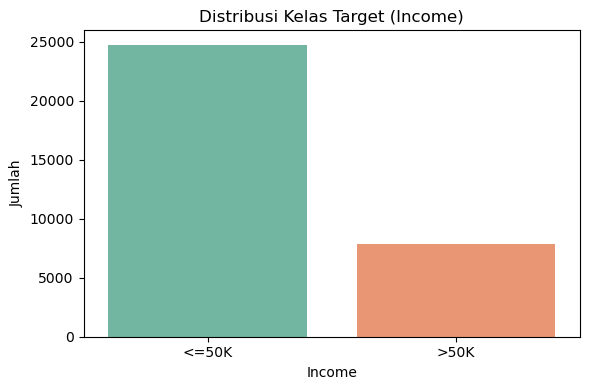

In [11]:
# 1. Visualisasi Target Income

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='income', palette='Set2')
plt.title('Distribusi Kelas Target (Income)')
plt.xlabel('Income')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()



Insight Target Income:

- Mayoritas individu (~75%) memiliki penghasilan ≤ 50K.

- Hanya sekitar 25% yang berpenghasilan > 50K.

- Distribusi tidak seimbang (imbalanced class), yang perlu diperhatikan saat membangun model prediktif.

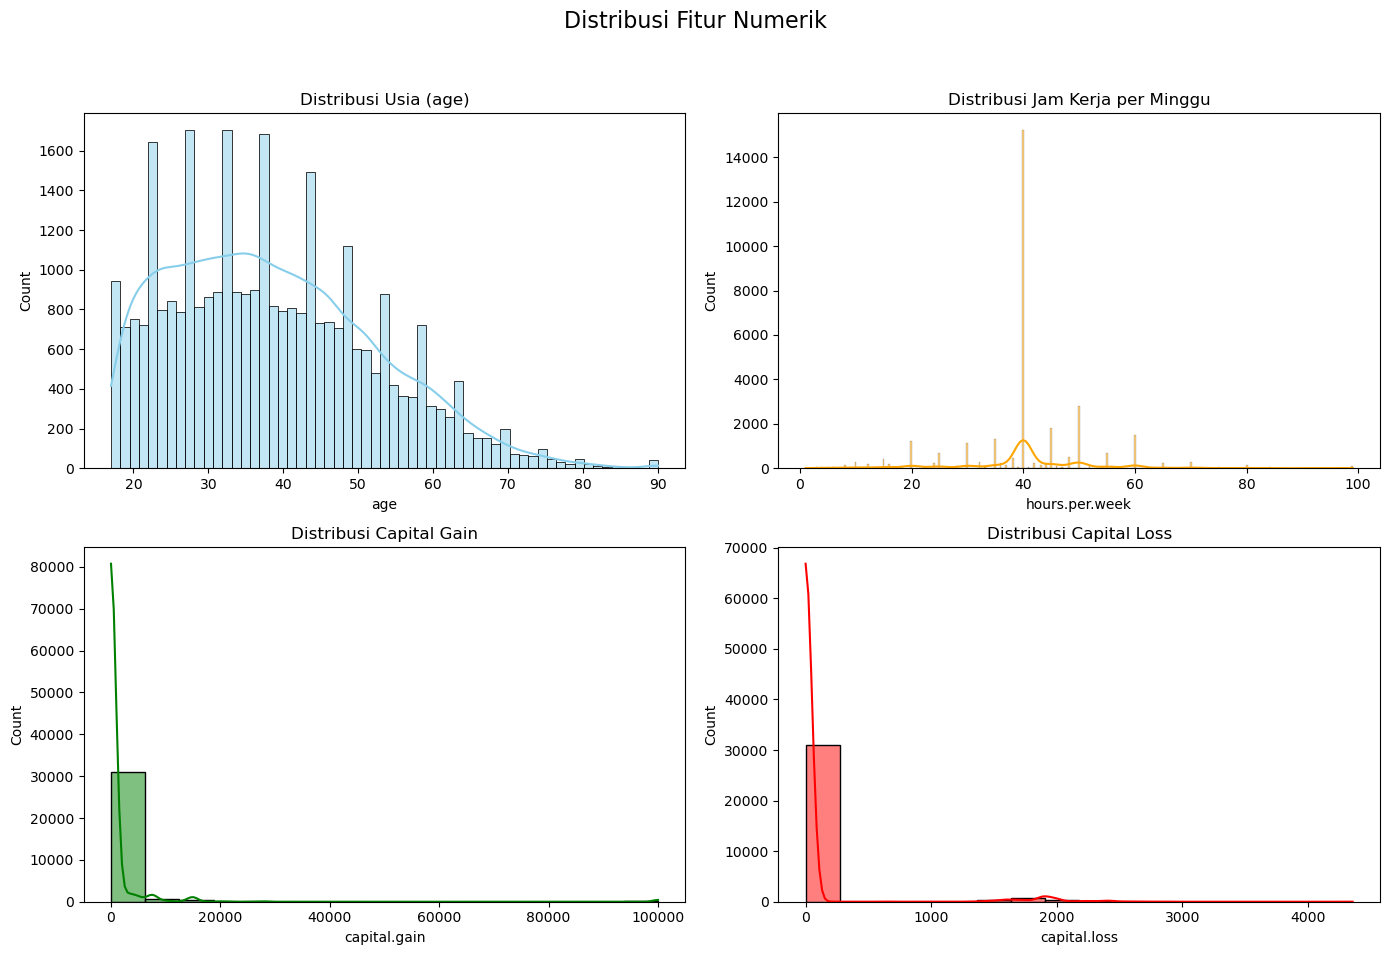

In [ ]:
# 2. Visualisasi Distribusi Numerik

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribusi Fitur Numerik', fontsize=16)

# Age
sns.histplot(df['age'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribusi Usia (age)')

# Hours per week
sns.histplot(df['hours.per.week'], kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Distribusi Jam Kerja per Minggu')

# Capital gain
sns.histplot(df['capital.gain'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribusi Capital Gain')

# Capital loss
sns.histplot(df['capital.loss'], kde=True, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Distribusi Capital Loss')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Insight:

- Age

    - Mayoritas berusia 20–50 tahun, dominasi usia produktif.

    - Semakin sedikit data di atas usia 60.

- Hours per Week

    - Puncak di 40 jam/minggu → mayoritas bekerja penuh waktu.

    - Outlier di atas 60 jam perlu perhatian.

- Capital Gain

    - Sebagian besar bernilai 0, hanya sedikit dengan nilai tinggi (outlier).

    - Cocok diubah ke fitur biner: “ada capital gain atau tidak”.

- Capital Loss

    - Mirip dengan capital gain, mayoritas 0.

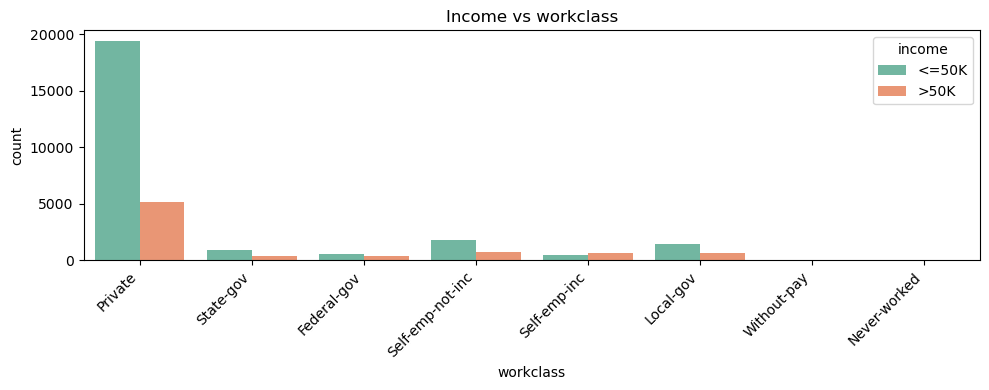

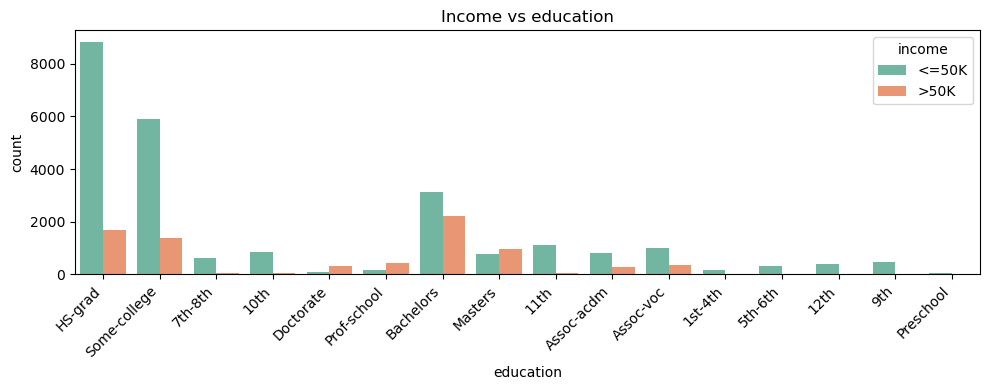

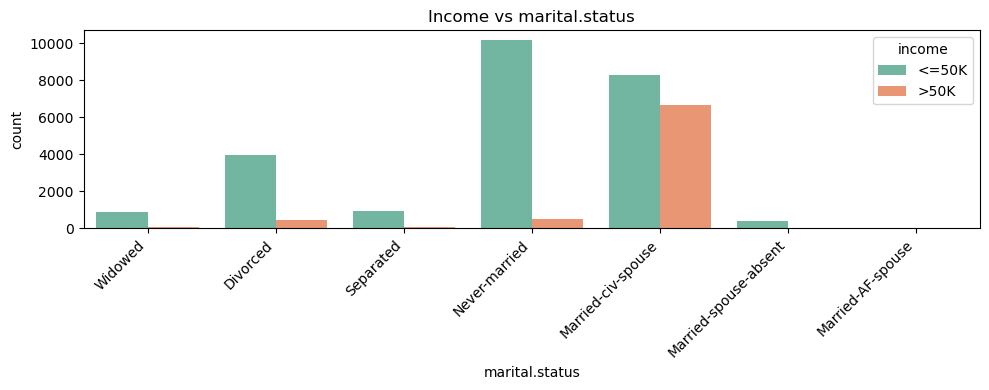

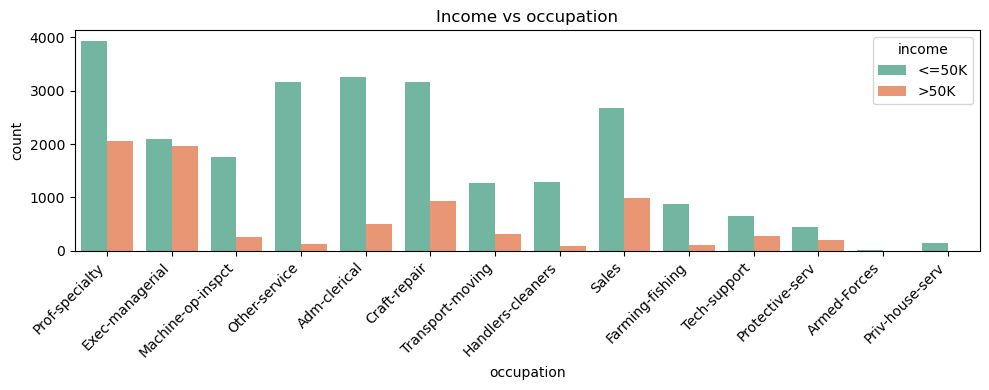

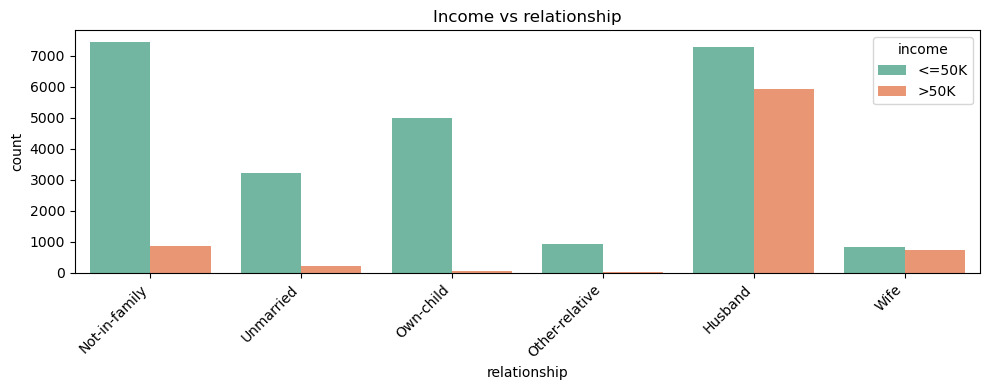

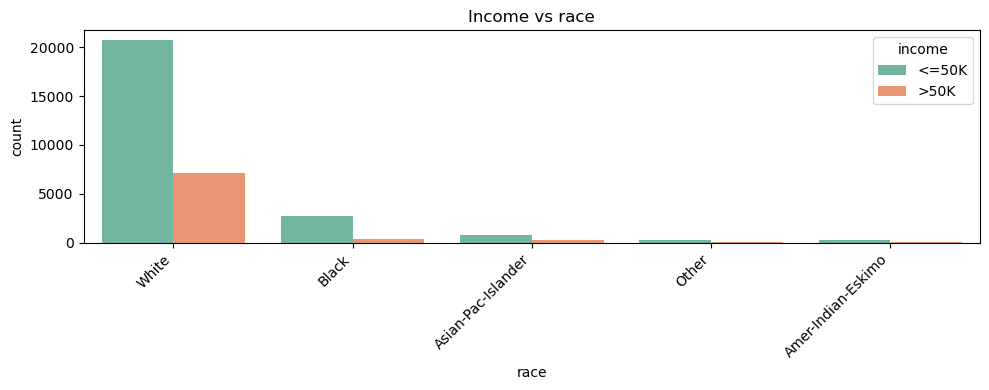

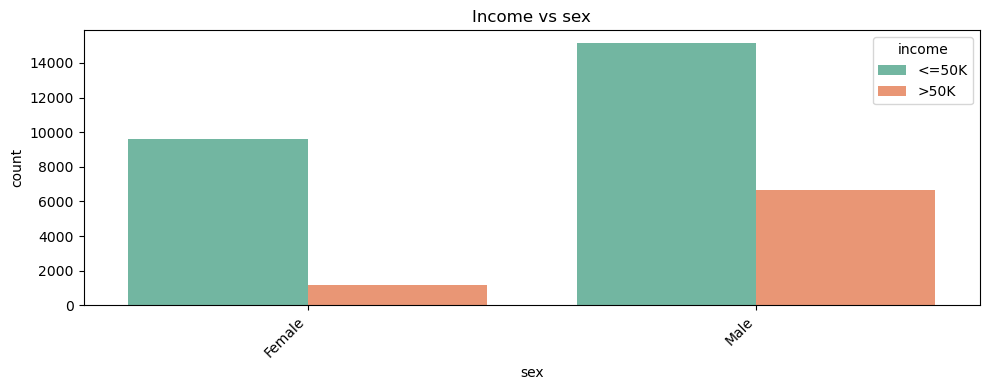

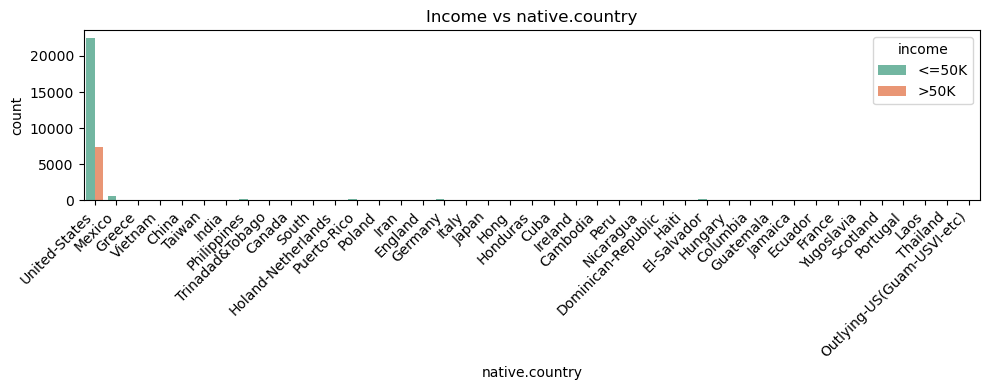

In [13]:
# 3. Visualisasi Fitur Kategorikal vs Income
# =====================================
categorical_features = ['workclass', 'education', 'marital.status', 'occupation',
                        'relationship', 'race', 'sex', 'native.country']

for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df[df[col] != '?'], x=col, hue='income', palette='Set2')
    plt.title(f'Income vs {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Insight Fitur Kategorikal vs Income 


- Workclass

    - Kelas "Private" mendominasi, tetapi mayoritas berpenghasilan ≤50K.

    - "Self-emp" dan "Federal-gov" cenderung memiliki proporsi lebih besar untuk >50K.

- Education

    - Individu dengan Bachelor, Masters, Doctorate lebih banyak berpenghasilan >50K.

    - Pendidikan dasar hingga sekolah menengah cenderung ≤50K.

- Marital Status

    - Married-civ-spouse mendominasi kelompok >50K.

    - Status Never-married dan Divorced cenderung berada di ≤50K.

- Occupation

    - Exec-managerial dan Prof-specialty paling banyak menghasilkan >50K.

    - Pekerjaan seperti Handlers-cleaners dan Machine-op-inspct dominan di ≤50K.

- Relationship

    - Husband paling sering muncul di kelas >50K.

    - Not-in-family dan Unmarried lebih sering di ≤50K.

- Race

    - Mayoritas data berasal dari White, dengan sebaran ke dua kelas income.

    - Ras lain cenderung lebih banyak berada di kelas ≤50K.

- Sex

    - Pria (Male) memiliki proporsi lebih tinggi di kelas >50K dibanding wanita.

    - Wanita (Female) mayoritas di kelas ≤50K.

- Native Country

    - Mayoritas berasal dari United States, dengan sebagian kecil dari negara lain.

    - Individu dari luar AS cenderung memiliki penghasilan ≤50K.

## Split data into separate training and test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Feature Engineering

### Encode categorical variables

In [15]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [17]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


## Logistic Regression model with all features

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score dengan semua feature: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score dengan semua feature: 0.8218


## Logistic Regression with PCA

### Explained Variance Ratio

Informasi yang sangat berguna dalam PCA adalah rasio variansi yang dijelaskan oleh setiap komponen utama (principal component). Nilai ini menunjukkan proporsi variansi dalam dataset yang berada di sepanjang sumbu setiap komponen utama.

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_


array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

### Logistic Regression with first 13 features

In [20]:
X = df.drop(['income','native.country'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score dengan 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score dengan 13 features: 0.8213


### Logistic Regression with first 12 features

In [21]:
X = df.drop(['income','native.country', 'hours.per.week'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score with the first 12 features: 0.8227


### Logistic Regression with first 11 features

In [22]:
X = df.drop(['income','native.country', 'hours.per.week', 'capital.loss'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score dengan 11 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score dengan 11 features: 0.8186


# Memilih Jumlah Dimensi yang Tepat

- Proses di atas bekerja dengan baik jika jumlah dimensi masih sedikit. Namun, proses tersebut menjadi cukup merepotkan jika kita memiliki jumlah dimensi yang besar. Dalam kasus seperti itu, pendekatan yang lebih baik adalah menghitung jumlah dimensi minimum yang dapat menjelaskan proporsi variansi yang signifikan. Kode berikut menghitung PCA tanpa mengurangi dimensi terlebih dahulu, kemudian menentukan jumlah dimensi minimum yang dibutuhkan untuk mempertahankan 90% variansi dari data latih.

In [23]:
X = df.drop(['income'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 12


Plot Rasio Variansi yang Dijelaskan terhadap Jumlah Dimensi

Opsi alternatifnya adalah dengan memplot rasio variansi yang dijelaskan sebagai fungsi dari jumlah dimensi. Pada plot tersebut, kita perlu mencari "elbow" (titik siku), yaitu titik di mana peningkatan variansi yang dijelaskan mulai melambat. Titik tersebut dapat dianggap sebagai dimensionalitas intrinsik dari dataset.

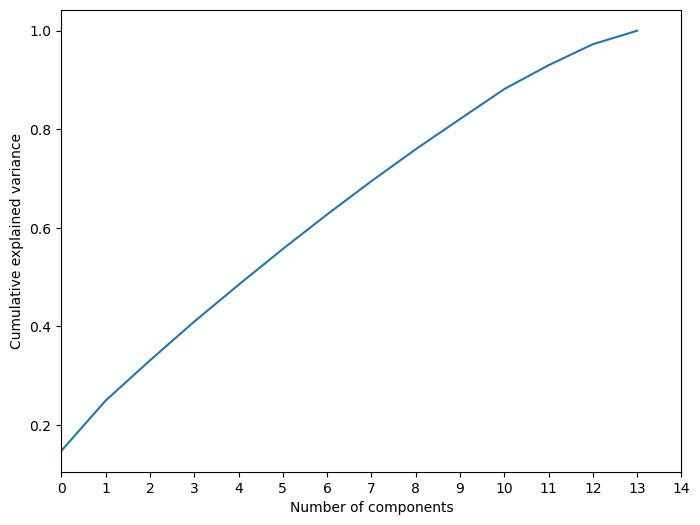

In [24]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 14)
plt.xticks(np.arange(0, 15, 1))  # Opsional
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### Comment

The above plot shows that almost 90% of variance is explained by the first 12 components.

Kesimpulan
- Dalam notebook ini, saya membahas Principal Component Analysis (PCA), salah satu teknik reduksi dimensi yang paling banyak digunakan.

- Saya mendemonstrasikan implementasi PCA dengan Logistic Regression menggunakan dataset Adult.

- Akurasi tertinggi yang diperoleh adalah 0.8227, dengan menggunakan 12 komponen utama pertama.

- Seperti yang diperkirakan, 12 dimensi sudah cukup untuk mempertahankan sekitar 90% variansi dari dataset.

- Terakhir, saya memplot rasio variansi yang dijelaskan terhadap jumlah komponen, dan grafik tersebut mengonfirmasi bahwa sekitar 90% variansi dijelaskan oleh 12 komponen pertama.